<a href="https://colab.research.google.com/github/WafaSanaa/NLP_ia/blob/main/Customer_Satisfaction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Modules

In [2]:
import pandas as pd
import string

import nltk

#Downloading the NLTK english stop words
nltk.download('stopwords')
#Downloading the NLTK sentence tokenizer
nltk.download('punkt')
#Downloading the NLTK POS Tagger
nltk.download('averaged_perceptron_tagger')
#Downloading the NLTK Vader Lexicon
nltk.download('vader_lexicon')

from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
print("Modules are imported! :)")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Modules are imported! :)


Loading the customer reviews dataset

In [3]:
data = pd.read_csv("/dataset (1).csv")
data.head()

,product_review,product_category
0,"I love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,Beautifully made pants and on trend with the f...,Bottoms
2,I never would have given these pants a second ...,Bottoms
3,These pants are even better in person. the onl...,Bottoms
4,The silhouette and length of this skirt and le...,Bottoms


In [4]:
data.shape

(3376, 2)

In [5]:
data.product_review[0]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [6]:
data.product_review[10]

"Like other reviewers noted, the pics don't do this skirt justice. it is truly beautiful with an intricate lace pattern and rich colors. can't wait to wear this to work!"

In [8]:
data.product_category.value_counts()

,count
product_category,
Bottoms,685
Dresses,681
Tops,680
Jackets,680
Intimate,650


Clean and preprocess the reviews

In [9]:
review = data.product_review[0]
review.lower()

"i love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [11]:
data.product_review =  data.product_review.str.lower()
data.head()

,product_review,product_category
0,"i love, love, love this jumpsuit. it's fun, fl...",Bottoms
1,beautifully made pants and on trend with the f...,Bottoms
2,i never would have given these pants a second ...,Bottoms
3,these pants are even better in person. the onl...,Bottoms
4,the silhouette and length of this skirt and le...,Bottoms


In [15]:
data.product_review[0].translate(str.maketrans('','',string.punctuation))

'i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments'

In [18]:
data.product_review = data.product_review.str.translate(str.maketrans('','',string.punctuation))
data.head()

,product_review,product_category
0,i love love love this jumpsuit its fun flirty ...,Bottoms
1,beautifully made pants and on trend with the f...,Bottoms
2,i never would have given these pants a second ...,Bottoms
3,these pants are even better in person the only...,Bottoms
4,the silhouette and length of this skirt and le...,Bottoms


Tokenize the reviews and removing the stop words

In [22]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [23]:
tokens = nltk.word_tokenize(data.product_review[0])
tokens

['i',
 'love',
 'love',
 'love',
 'this',
 'jumpsuit',
 'its',
 'fun',
 'flirty',
 'and',
 'fabulous',
 'every',
 'time',
 'i',
 'wear',
 'it',
 'i',
 'get',
 'nothing',
 'but',
 'great',
 'compliments']

In [25]:
english_stopwords = stopwords.words("english")
english_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [26]:
[t for t in tokens if t not in english_stopwords]

['love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliments']

In [28]:
data['product_review_tokenized'] = data.product_review.apply(nltk.word_tokenize)
data.head()

,product_review,product_category,product_review_tokenized
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt..."


In [29]:
def remove_stopwords(tokens):
  return [t for t in tokens if t not in english_stopwords]
data['cleaned_tokens'] = data.product_review_tokenized.apply(remove_stopwords)
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering..."


In [33]:
data['product_review_cleaned'] = data.cleaned_tokens.apply(lambda x: ' '.join(x))
data.head()


,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...


Exploring the tokens and product categories

In [34]:
data.product_category.value_counts()

,count
product_category,
Bottoms,685
Dresses,681
Tops,680
Jackets,680
Intimate,650


In [38]:
tops_tokens = []
for x in data[data.product_category == 'Tops'].cleaned_tokens:
  tops_tokens.extend(x)
len(tops_tokens)

18527

In [40]:
freq_dist = FreqDist(tops_tokens)
freq_dist.most_common(20)

[('love', 337),
 ('top', 334),
 ('wear', 233),
 ('great', 229),
 ('size', 211),
 ('color', 185),
 ('shirt', 172),
 ('fit', 167),
 ('im', 149),
 ('perfect', 146),
 ('small', 141),
 ('like', 140),
 ('soft', 136),
 ('flattering', 128),
 ('little', 120),
 ('one', 119),
 ('sweater', 118),
 ('fits', 112),
 ('bought', 111),
 ('well', 109)]

In [41]:
dresses_tokens = []
for x in data[data.product_category == 'Dresses'].cleaned_tokens:
  dresses_tokens.extend(x)
len(dresses_tokens)

freq_dist = FreqDist(dresses_tokens)
freq_dist.most_common(20)

[('dress', 1062),
 ('like', 321),
 ('fabric', 254),
 ('would', 220),
 ('size', 207),
 ('fit', 207),
 ('back', 166),
 ('look', 157),
 ('really', 154),
 ('love', 152),
 ('im', 146),
 ('ordered', 146),
 ('material', 139),
 ('small', 128),
 ('looks', 119),
 ('looked', 118),
 ('much', 111),
 ('also', 106),
 ('top', 105),
 ('wear', 105)]

Extracting the adjectives used in the reviews

In [42]:
data.product_review[0]

'i love love love this jumpsuit its fun flirty and fabulous every time i wear it i get nothing but great compliments'

In [45]:
nltk.download('averaged_perceptron_tagger_eng')
nltk.pos_tag(data.product_review_tokenized[0])

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('i', 'NN'),
 ('love', 'VBP'),
 ('love', 'NN'),
 ('love', 'NN'),
 ('this', 'DT'),
 ('jumpsuit', 'NN'),
 ('its', 'PRP$'),
 ('fun', 'NN'),
 ('flirty', 'NN'),
 ('and', 'CC'),
 ('fabulous', 'JJ'),
 ('every', 'DT'),
 ('time', 'NN'),
 ('i', 'NN'),
 ('wear', 'VBP'),
 ('it', 'PRP'),
 ('i', 'JJ'),
 ('get', 'VBP'),
 ('nothing', 'NN'),
 ('but', 'CC'),
 ('great', 'JJ'),
 ('compliments', 'NNS')]

In [48]:
nltk.download('tagsets_json')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets_json.zip.


In [49]:
data['POS_tokens'] = data.product_review_tokenized.apply(nltk.pos_tag)
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned,POS_tokens
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),..."
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),..."
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)..."
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,..."
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng..."


In [50]:
def extract_adj(tokens):
  adjectives = []
  for x in tokens:
    if x[1] in ['JJ','JJR','JJS']:
      adjectives.append(x[0])
  return adjectives

data['adjectives'] = data.POS_tokens.apply(extract_adj)
data.head()


,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned,POS_tokens,adjectives
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]"
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]"
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]"
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]"
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi..."


In [53]:
adj_tops = " "
for x in data[data.product_category == 'Tops'].adjectives:
  adj_tops += " ".join(x) + " "
adj_tops

' flattering due adjustable perfect cardigan last i pale gorgeous little hte ejans i glad i white crisp clean i great perfect wear cant wrong wasnt seethrough white careful i great comfy classic quirky beautiful practical cropped boxy perfect longer camisole little thin small gorgeous unsnapped skinny true great casual flare grey back nice beautiful ordinary usual tight chest i cute plaid great local comfortable bad little dressier small black top comfortable comfortable good perfect roomy warm cute collar beautiful unique busty top small wouldve fit better adorable bib favorite small perfect soft comfortable unusual asymmetrical front visual little ive adorable i comfortable feminine great dark perfect wish happy comfortable flattering comfortable light top lovely floral great white top happy top online little i little large petite longer regular perfect give soft comfortable short much uncomfortable doesnt easier navy boxy whole cute more fabric i super read same specific petite weig

(np.float64(-0.5), np.float64(799.5), np.float64(599.5), np.float64(-0.5))

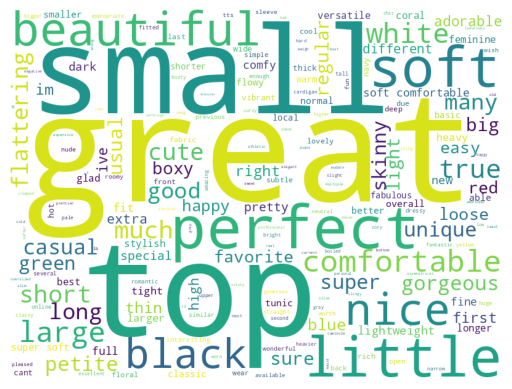

In [54]:
word_cloud = WordCloud(width = 800, height = 600, background_color = 'white').generate(adj_tops)
plt.imshow(word_cloud)
plt.axis('off')

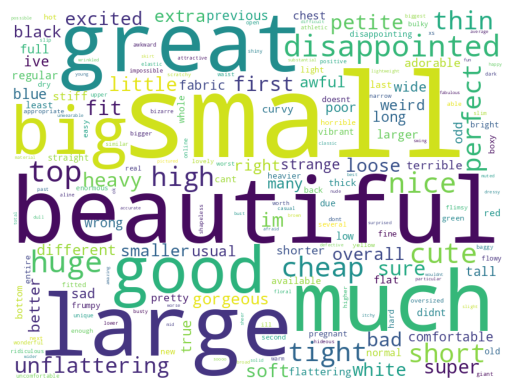

In [56]:
def visualize_adjectives(category):
  adjectives = " "
  for x in data[data.product_category ==category].adjectives:
    adjectives += " ".join(x) + " "
  word_cloud = WordCloud(width = 800, height = 600, background_color = 'white').generate(adjectives)
  plt.imshow(word_cloud)
  plt.axis("off")
  plt.show()

visualize_adjectives("Dresses")

Finding the sentiment of each review

In [57]:
sent = SentimentIntensityAnalyzer()
review = data.product_review_cleaned[0]
print(review)

scores = sent.polarity_scores(review)
print(scores)

love love love jumpsuit fun flirty fabulous every time wear get nothing great compliments
{'neg': 0.171, 'neu': 0.185, 'pos': 0.644, 'compound': 0.9464}


In [61]:
def polarity_score(review):
  sent = SentimentIntensityAnalyzer()

  scores = sent.polarity_scores(review)
  compound = scores['compound']

  if compound > 0.05:
    return "positive"
  elif compound < -0.5:
      return "negative"
  else:
      return "neutral"

polarity_score("This product is amazing the quality is really good")

'positive'

In [62]:
data['sentiment'] = data.product_review_cleaned.apply(polarity_score)
data.head()

,product_review,product_category,product_review_tokenized,cleaned_tokens,product_review_cleaned,POS_tokens,adjectives,sentiment
0,i love love love this jumpsuit its fun flirty ...,Bottoms,"[i, love, love, love, this, jumpsuit, its, fun...","[love, love, love, jumpsuit, fun, flirty, fabu...",love love love jumpsuit fun flirty fabulous ev...,"[(i, NN), (love, VBP), (love, NN), (love, NN),...","[fabulous, i, great]",positive
1,beautifully made pants and on trend with the f...,Bottoms,"[beautifully, made, pants, and, on, trend, wit...","[beautifully, made, pants, trend, flared, crop...",beautifully made pants trend flared crop much ...,"[(beautifully, RB), (made, VBN), (pants, NNS),...","[flared, much]",positive
2,i never would have given these pants a second ...,Bottoms,"[i, never, would, have, given, these, pants, a...","[never, would, given, pants, second, look, onl...",never would given pants second look online per...,"[(i, NN), (never, RB), (would, MD), (have, VB)...","[second, much, cuter, right, small, loose, navy]",positive
3,these pants are even better in person the only...,Bottoms,"[these, pants, are, even, better, in, person, ...","[pants, even, better, person, downside, need, ...",pants even better person downside need dry cle...,"[(these, DT), (pants, NNS), (are, VBP), (even,...","[only, dry]",positive
4,the silhouette and length of this skirt and le...,Bottoms,"[the, silhouette, and, length, of, this, skirt...","[silhouette, length, skirt, length, flattering...",silhouette length skirt length flattering clas...,"[(the, DT), (silhouette, NN), (and, CC), (leng...","[classic, comfortable, favorite, different, hi...",positive


In [63]:
df = data.groupby(["product_category","sentiment"]).size().reset_index(name = "counts")
df

,product_category,sentiment,counts
0,Bottoms,negative,3
1,Bottoms,neutral,5
2,Bottoms,positive,677
3,Dresses,negative,36
4,Dresses,neutral,82
5,Dresses,positive,563
6,Intimate,negative,5
7,Intimate,neutral,35
8,Intimate,positive,610
9,Jackets,negative,2


In [64]:
px.bar(df, x ="product_category", y = "counts", color = "sentiment", barmode = "group")